## Menentukan Pertanyaan Bisnis

1. Berapa rata-rata jumlah pengguna sepeda pada hari kerja dibandingkan dengan hari libur?
2. Bagaimana suhu mempengaruhi jumlah pengguna sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [3]:
#Mengimpor library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
#Membaca dataset
df = pd.read_csv('data/day.csv')

In [5]:
#Menampilkan baris pertama
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**

Dataset day.csv berisi data mengenai penggunaan sepeda harian dari sistem bike-sharing. Berikut adalah deskripsi dari kolom-kolom yang ada:

1. instant: ID unik untuk setiap baris.
2. dteday: Tanggal observasi.
3. Season dalam setahun, diwakili dengan angka:
* 1: Musim Semi
* 2: Musim Panas
* 3: Musim Gugur
* 4: Musim Dingin
4. yr: Tahun, dengan 0 untuk tahun 2011 dan 1 untuk tahun 2012.
5. mnth: Bulan dalam setahun (1 hingga 12).
6. holiday: Apakah hari tersebut merupakan hari libur (1 jika hari libur, 0 jika tidak).
7. weekday: Hari dalam minggu (0 - 6, di mana 0 adalah Minggu)..
8. workingday: Apakah hari tersebut merupakan hari kerja (1 jika hari kerja, 0 jika tidak).
9. weathersit: Kondisi cuaca, diwakili dengan angka:
* 1: Cuaca cerah atau sedikit mendung.
* 2: Cuaca berkabut atau mendung.
* 3: Hujan ringan atau salju ringan.
* 4: Hujan deras, badai, atau salju lebat.
10. temp: Suhu normalisasi, nilai antara 0 hingga 1.
11. atemp: Suhu terasa atau suhu yang dirasakan, nilai antara 0 hingga 1.
12. hum: Kelembaban, nilai antara 0 hingga 1.
13. windspeed: Kecepatan angin, nilai antara 0 hingga 1.
14. casual: Jumlah pengguna sepeda non-terdaftar.
15. registered: Jumlah pengguna sepeda terdaftar.
16. cnt: Jumlah total pengguna sepeda (penjumlahan dari casual dan registered).

Dataset ini menyediakan informasi yang dapat digunakan untuk menganalisis tren penggunaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, dan waktu.


### Assessing Data

**Menilai tabel**

In [4]:
#Cek informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Mengecek missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Mengecek duplikasi data
df.duplicated().sum()

0

In [7]:
#Mengecek apakah ada inaccurate data
invalid_cnt = df[df['cnt'] < 0]
print(f"Jumlah total pengguna sepeda yang tidak akurat (negatif): {len(invalid_cnt)}")

Jumlah total pengguna sepeda yang tidak akurat (negatif): 0


**Insight:**
1. Tidak ditemukan **missing values**, **duplikasi data**, atau **inaccurate data**, sehingga data bersih.
   
2. Sebagian besar variabel memiliki tipe data yang sesuai, kecuali kolom **`dteday`**, yang bisa diubah dari tipe **object** ke **datetime** untuk memudahkan analisis.

### Cleaning Data

In [8]:
#Mengubah tipe data pada 'dteday' ke format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
#Cek data setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
1. Dalam proses ini, kolom `dteday` diubah dari tipe object menjadi datetime untuk memudahkan analisis.

## Exploratory Data Analysis (EDA)

### Explore `df`

In [10]:
# Tampilkan sampel acak
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301
528,529,2012-06-12,2,1,6,0,2,1,2,0.653333,0.597875,0.833333,0.214546,477,4495,4972
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
386,387,2012-01-22,1,1,1,0,0,0,2,0.162500,0.162250,0.796250,0.199638,196,1781,1977
133,134,2011-05-14,2,0,5,0,6,0,2,0.520833,0.500629,0.922500,0.134950,902,2507,3409
437,438,2012-03-13,1,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950,762,5085,5847
118,119,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,4595
618,619,2012-09-10,3,1,9,0,1,1,1,0.583333,0.565654,0.503750,0.258713,1118,6407,7525
309,310,2011-11-06,4,0,11,0,0,0,1,0.348333,0.362358,0.734583,0.092054,952,2697,3649


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata jumlah pengguna sepeda pada hari kerja dibandingkan dengan hari libur?

C:\Users\nurri\AppData\Local\Temp\ipykernel_18520\358333428.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Hari', y='Rata-rata Pengguna', palette=['red', 'blue'])


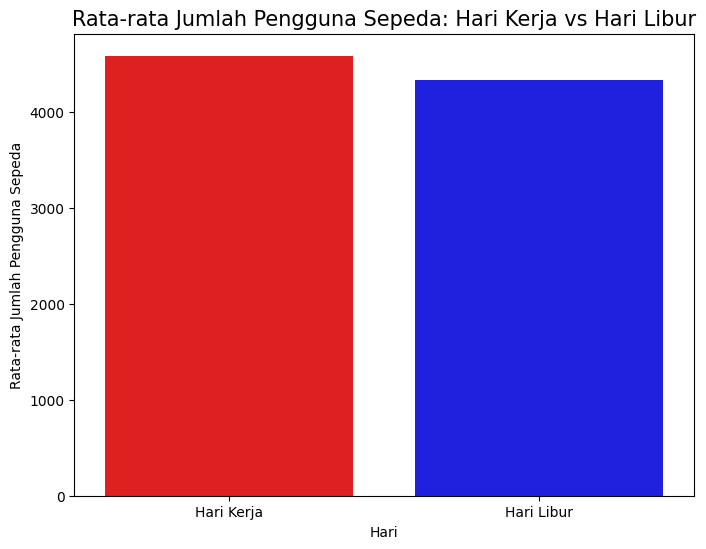

Rata-rata jumlah pengguna sepeda pada hari kerja adalah 4584.82 orang.
Rata-rata jumlah pengguna sepeda pada hari libur adalah 4330.17 orang.


In [11]:
# Menambahkan kolom untuk memisahkan hari kerja dan hari libur
df['Hari'] = df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur')

# Menghitung rata-rata jumlah pengguna sepeda untuk hari kerja dan hari libur
working_day_avg = df[df['workingday'] == 1]['cnt'].mean()
holiday_avg = df[df['workingday'] == 0]['cnt'].mean()

# Membuat DataFrame baru untuk visualisasi
avg_df = pd.DataFrame({
    'Hari': ['Hari Kerja', 'Hari Libur'],
    'Rata-rata Pengguna': [working_day_avg, holiday_avg]
})

# Visualisasi Barplot
plt.figure(figsize=(8,6))
sns.barplot(data=avg_df, x='Hari', y='Rata-rata Pengguna', palette=['red', 'blue'])
plt.title('Rata-rata Jumlah Pengguna Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

# Menambahkan output teks
print(f"Rata-rata jumlah pengguna sepeda pada hari kerja adalah {working_day_avg:.2f} orang.")
print(f"Rata-rata jumlah pengguna sepeda pada hari libur adalah {holiday_avg:.2f} orang.")

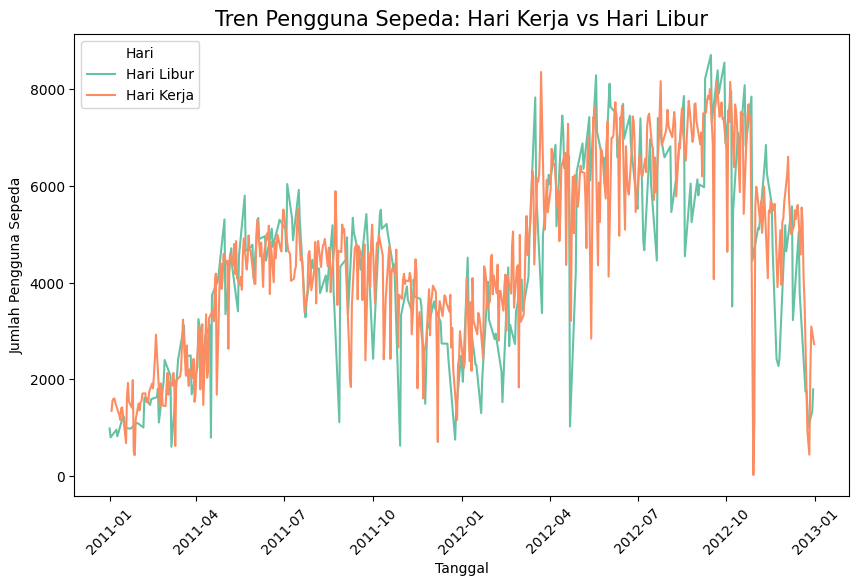

Terdapat 500 hari kerja dan 231 hari libur dalam dataset.


In [12]:
import warnings

# Menonaktifkan FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Line plot untuk tren pengguna sepeda berdasarkan hari kerja dan hari libur
df['dteday'] = pd.to_datetime(df['dteday'])
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='dteday', y='cnt', hue='Hari', palette='Set2')
plt.title('Tren Pengguna Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Tanggal')
plt.xticks(rotation=45)
plt.show()

# Menambahkan output teks
total_working_days = len(df[df['workingday'] == 1])
total_holidays = len(df[df['workingday'] == 0])
print(f"Terdapat {total_working_days} hari kerja dan {total_holidays} hari libur dalam dataset.")

**Insight:**

1. **Penggunaan Sepeda yang Lebih Tinggi pada Hari Kerja**: Rata-rata jumlah pengguna sepeda lebih tinggi pada hari kerja (4,584.82 orang) dibandingkan dengan hari libur (4,330.17 orang), menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi di hari kerja.

2. **Fluktuasi pada Hari Libur**: Meskipun rata-rata penggunaan sepeda di hari libur masih cukup signifikan, terdapat fluktuasi yang lebih besar dalam jumlah pengguna sepeda. Hal ini dapat disebabkan oleh faktor eksternal seperti cuaca atau kegiatan rekreasi yang mempengaruhi keputusan untuk bersepeda.

### Pertanyaan 2: Bagaimana suhu mempengaruhi jumlah pengguna sepeda harian?

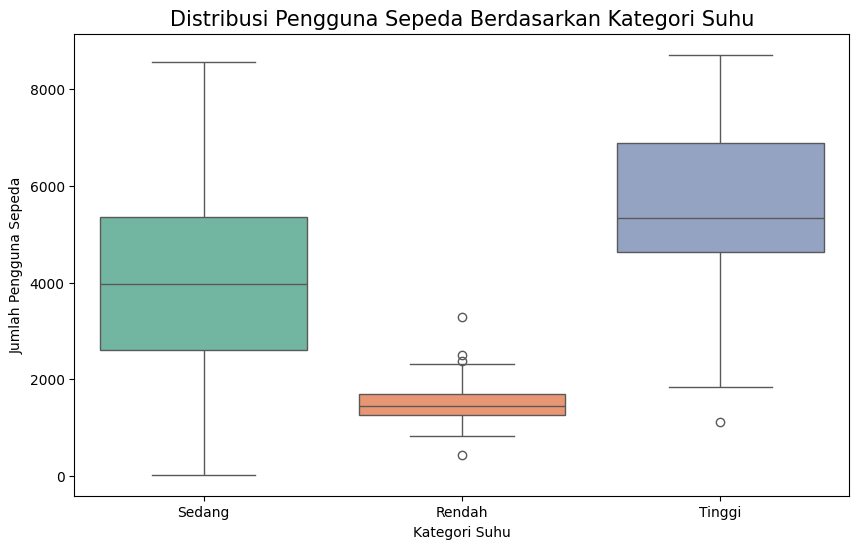

In [13]:
# Menentukan kategori suhu
def categorize_temp(temp):
    if temp < 0.2:
        return 'Rendah'
    elif 0.2 <= temp < 0.6:
        return 'Sedang'
    else:
        return 'Tinggi'

df['Temp Kategori'] = df['temp'].apply(categorize_temp)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Temp Kategori', y='cnt', palette='Set2')
plt.title('Distribusi Pengguna Sepeda Berdasarkan Kategori Suhu', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Kategori Suhu')
plt.show()

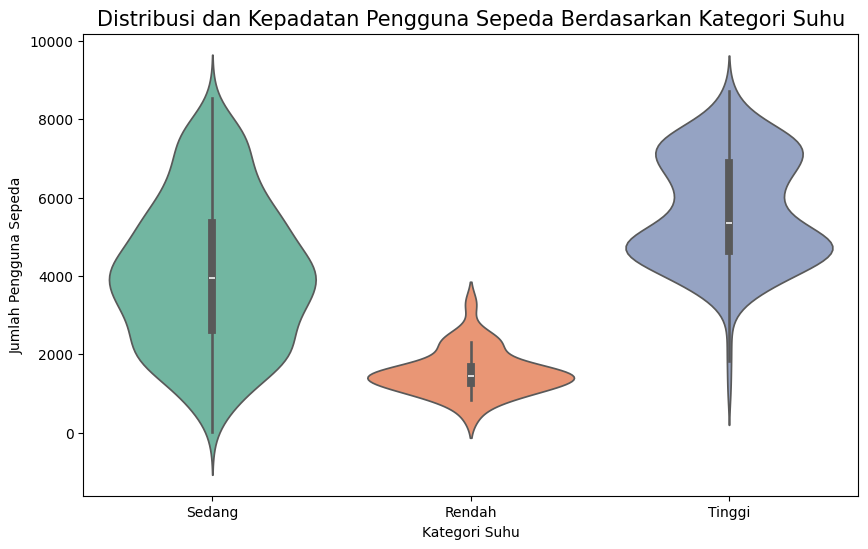

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Temp Kategori', y='cnt', palette='Set2')
plt.title('Distribusi dan Kepadatan Pengguna Sepeda Berdasarkan Kategori Suhu', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Kategori Suhu')
plt.show()

**Insight:**


1. **Distribusi Berdasarkan Kategori Suhu**: Boxplot menunjukkan bahwa pada kategori suhu tinggi, terdapat rentang pengguna sepeda yang lebih luas, mengindikasikan bahwa suhu yang lebih hangat dapat mendorong variasi penggunaan sepeda. Sebaliknya, pada suhu rendah, jumlah pengguna sepeda cenderung sedikit dan terdistribusi lebih sempit, mencerminkan bahwa kondisi dingin mengurangi minat untuk bersepeda.

2. **Kepadatan Pengguna pada Suhu Sedang**: Violin plot memperlihatkan bahwa pada suhu sedang, terdapat kepadatan pengguna sepeda yang lebih tinggi. Ini menunjukkan bahwa suhu yang nyaman cenderung menarik lebih banyak orang untuk menggunakan sepeda sebagai pilihan transportasi.

## Conclusion

1. Conclution pertanyaan 1
- Sepeda lebih sering digunakan sebagai alat transportasi pada hari kerja, dengan rata-rata jumlah pengguna mencapai 4,584.82 orang, dibandingkan dengan 4,330.17 orang pada hari libur. Meskipun penggunaan sepeda pada hari libur tetap signifikan, terdapat fluktuasi yang lebih besar yang dapat dipengaruhi oleh faktor eksternal seperti cuaca atau kegiatan rekreasi.
2.  Conclution pertanyaan 2
- Distribusi pengguna sepeda berdasarkan kategori suhu menunjukkan bahwa suhu berperan penting dalam memengaruhi tingkat penggunaan sepeda. Boxplot mengindikasikan bahwa pada kategori suhu tinggi, terdapat variasi yang lebih besar dalam jumlah pengguna, yang menunjukkan bahwa suhu hangat dapat mendorong lebih banyak orang untuk bersepeda. Di sisi lain, suhu rendah cenderung mengurangi minat bersepeda, dengan distribusi yang lebih sempit. Violin plot menunjukkan kepadatan pengguna yang lebih tinggi pada suhu sedang, menandakan bahwa suhu yang nyaman menarik lebih banyak pengguna.